# Analysing & Visualization of Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

## Introduction to data set and a quick view:

WeRateDogs is a Twitter account that rates people's dog with a humorous comment about the dog. It was started in 2005 by college student Matt Nelson, and has recieved international media coverage for both its popularity and for the attention drawn to social media copyright law when it was suspended by Twitter.

In this, dogs are rated from 0 to 10 but a lot of ratings excess the maximum as an inner joke. In this project my aim was to analyze the trends, related dog categories, breeds, rates and their respective names basically on the number of favourites. One more thing I have looked into is the proportion of dog stages.

## 1. Possible Correlations

Initially, I plotted the correlation matrix to examine the trends between rating, favourite count and retweet count., this is done because as ratings is only part of sites joke. In the below plot we could find there is a relation between favourite count and retweet count, which isn't surprising because more retweets means they are more favourites.

In [3]:
df_master = pd.read_csv('twitter_archive_master.csv', date_parser = pd.datetools.to_datetime)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.core.datetools.to_datetime is deprecated. Please use pandas.core.tools.datetimes.to_datetime instead.
  """Entry point for launching an IPython kernel.


In [4]:
df_master.timestamp = pd.to_datetime(df_master.timestamp)

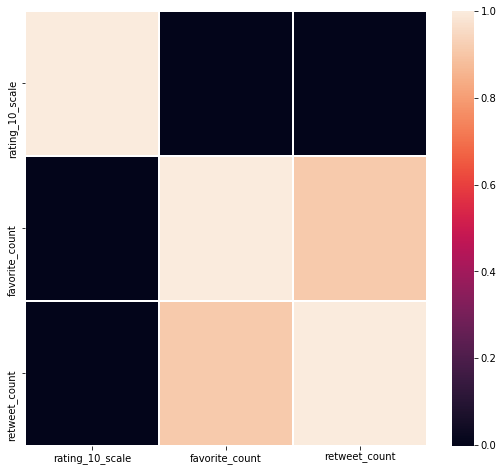

In [6]:
# Creating a smaller df with the numerical values to make a hetmap matrix of the correlations
df_corr_values = df_master[['rating_10_scale', 'favorite_count', 
                               'retweet_count']].copy()

fig, ax = plt.subplots(figsize=(9,8))
correlation = df_corr_values.corr()

sns.heatmap(correlation, 
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values,
            ax=ax,
            linewidth= 0.5);

## II. Most Popular Dog Names on the Account

As many of them would like to know the most popular dog names, below visualization gives the details for this. As rating has nothing to do with popularity, for this I will use the number of tweets for this. 

The most often tweeted dognames are Charlie, Lucy, Oliver, and Cooper. There are also few other names in the below visual.

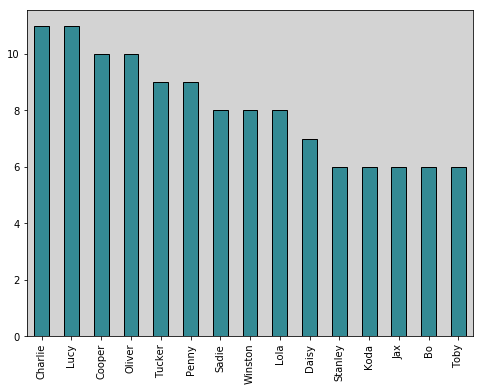

In [7]:
fig, ax = plt.subplots(figsize=(8,6))

names = df_master['dog_name']
names.value_counts().head(15).plot(kind = 'bar', color = "#348A94", ax = ax, edgecolor = ['Black']*len(names))
ax.set_facecolor('#D3D3D3')
plt.show();

## III. Most Beloved Breeds

The next analysis would be with number of favourite dogs and breeds to find out which dogs are the most preferred by the users. I have used the the most relevant results of the machine learning values, then categorized the dogs breeds based on the pictures. According to this analysis, golden retrievers are all time favourites among the users with more than 1600000 favourites, the second and third breeds are labrador retrievers and pembrokes with the below favourite counts.

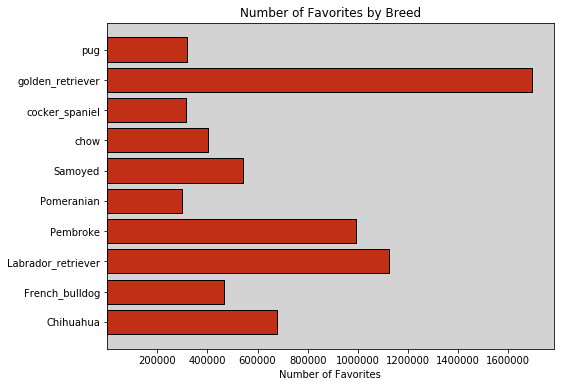

In [8]:
# Creating a favorite dataframe by the groupped breeds, counted the favorites.
df_favorite = df_master.groupby('p1')['favorite_count'].sum().reset_index()
df_sorted = df_favorite.sort_values('favorite_count', ascending=False).head(10)
ser_fav = df_sorted['favorite_count']
ser_breed = df_sorted['p1']

fig, ax = plt.subplots(figsize=(8,6))
fav = plt.barh(ser_breed, ser_fav, color = "#C13016", edgecolor = ['Black']*len(ser_breed))
ax.set_facecolor('#D3D3D3')
plt.xlabel('Number of Favorites')
plt.title('Number of Favorites by Breed')
plt.xticks(np.arange(200000, 1800000, 200000))
plt.show();

## IV. Dog Stages:

I have made analysis the dog stages by excluding the missing values to make a pie chart about the proportions of the categories. The most often used stage is "pupper" with more than 65%, the second one is "doggo" (about 22%).

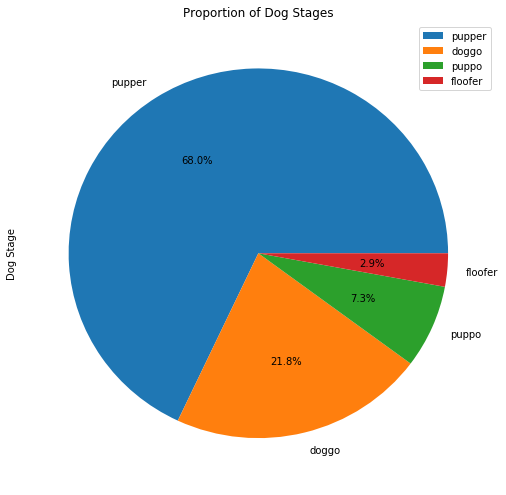

In [9]:
# Exclude the cases where the dog stage is missing.
df_stage = df_master[df_master['dog_stage'] != "None"]
fig, ax = plt.subplots(figsize=(8.5,8.5))

df_stage['dog_stage'].value_counts().plot(kind = 'pie', ax = ax, label = 'Dog Stage', autopct='%1.1f%%')
plt.title('Proportion of Dog Stages')
plt.legend();

## V. Ratings

I jus had look into the proportions of ratings. I decided to divide the ratings into different slabs(categories), so that we can have better visualization on ratings of dogs. I have given names for each category to emphasize that higher the rating the dog is cuter. According to analysis most dogs are rated between 0 & 13, only as 3% dogs are rated greater than 13. Anyways, the highest rating is 1776!!! The numerators exceed the denominators in about 40% of cases, i.e, about 40% dogs are having more than 10 ratings.

In [10]:
# Exclude the negative or null values from the dataframe
df_cuteness = df_master[df_master['rating_10_scale'] > 0]

In [11]:
cute_label = ['Nice Dog (0.999, 9.0]', 'Pretty (9.0, 10.0]', 'Cute (10.0, 11.0]', 'Wonderful (11.0, 12.0]', 'Can I Pet this dog?  (12.0, 13.0]', 'Gorgeous (13.0, 1776.0]']

cute_bins = pd.qcut(df_cuteness['rating_10_scale'], 6, labels = cute_label)

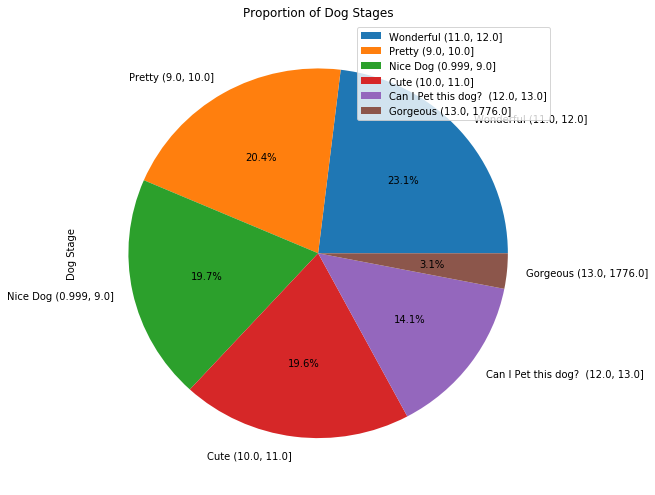

In [12]:
fig, ax = plt.subplots(figsize=(8.5,8.5))
cute_bins.value_counts().plot(kind = 'pie', ax = ax, label = 'Dog Stage', autopct='%1.1f%%')
plt.title('Proportion of Dog Stages')
plt.legend();

# Conclusion

We had some interesting facts related to twitter account WeRateDogs. Some conclusions supported our assumptions and correspond our daily experiences. But there are other results, telling the own unique story of this rapidly growing account -- based on rating greater 10, who would not say that dogs are so marvellous and cute.

### Source

https://en.wikipedia.org/wiki/WeRateDogs